In [8]:
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
customer_data = pd.read_csv("/home/ndjed/Downloads/Mall_Customers.csv")

In [4]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
X = customer_data[['Age', 'Spending Score (1-100)']].copy()

In [15]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # what does .intertia mean

/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/ndjed/Programs/anaconda3/envs/cmapPy3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Selecting the Number of Clusters Using the Elboew Method')

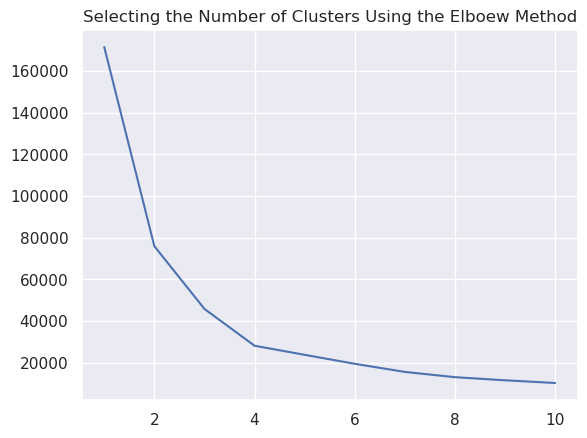

In [17]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('Selecting the Number of Clusters Using the Elboew Method')

In [33]:
from sklearn.mixture import GaussianMixture
n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=4)

In [34]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

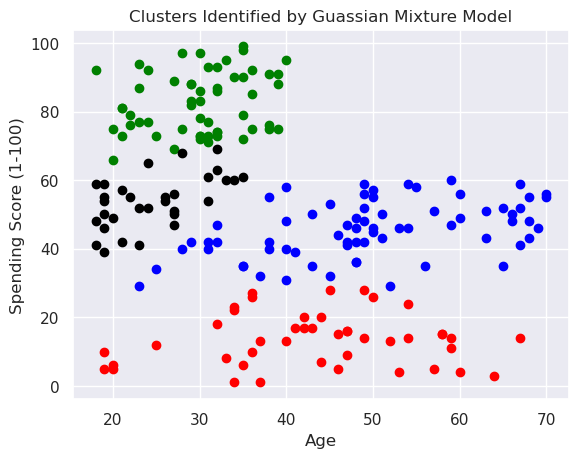

In [35]:
color=['blue','green','red', 'black', 'yellow']

for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["Age"],data["Spending Score (1-100)"],c=color[k])
plt.title("Clusters Identified by Guassian Mixture Model")    
plt.ylabel("Spending Score (1-100)")
plt.xlabel("Age")
plt.show()

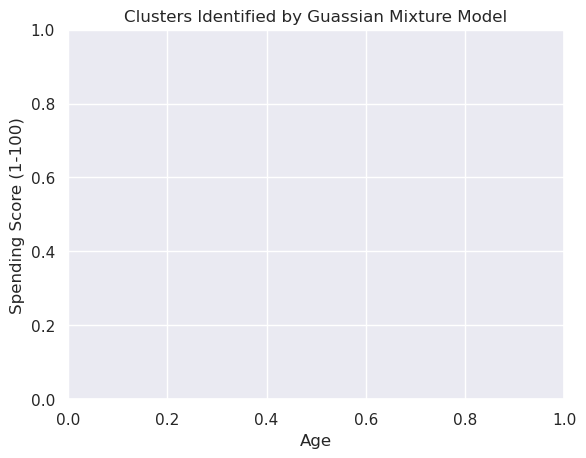